# Example

To download the csv just

wget https://www.aprendemachinelearning.com/wp-content/uploads/2018/03/analisis.csv

* usuario (el nombre en Twitter)
* “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* “co” =Conscientiousness – grado de orden, prolijidad, organización
* “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
* “ag” = Agreeableness – grado de empatía con los demás, temperamento
* “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

* Actor/actriz
* Cantante
* Modelo
* Tv, series
* Radio
* Tecnología
* Deportes
* Politica
* Escritor

In [4]:
#How many records we have on each cat
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


## Dataviz

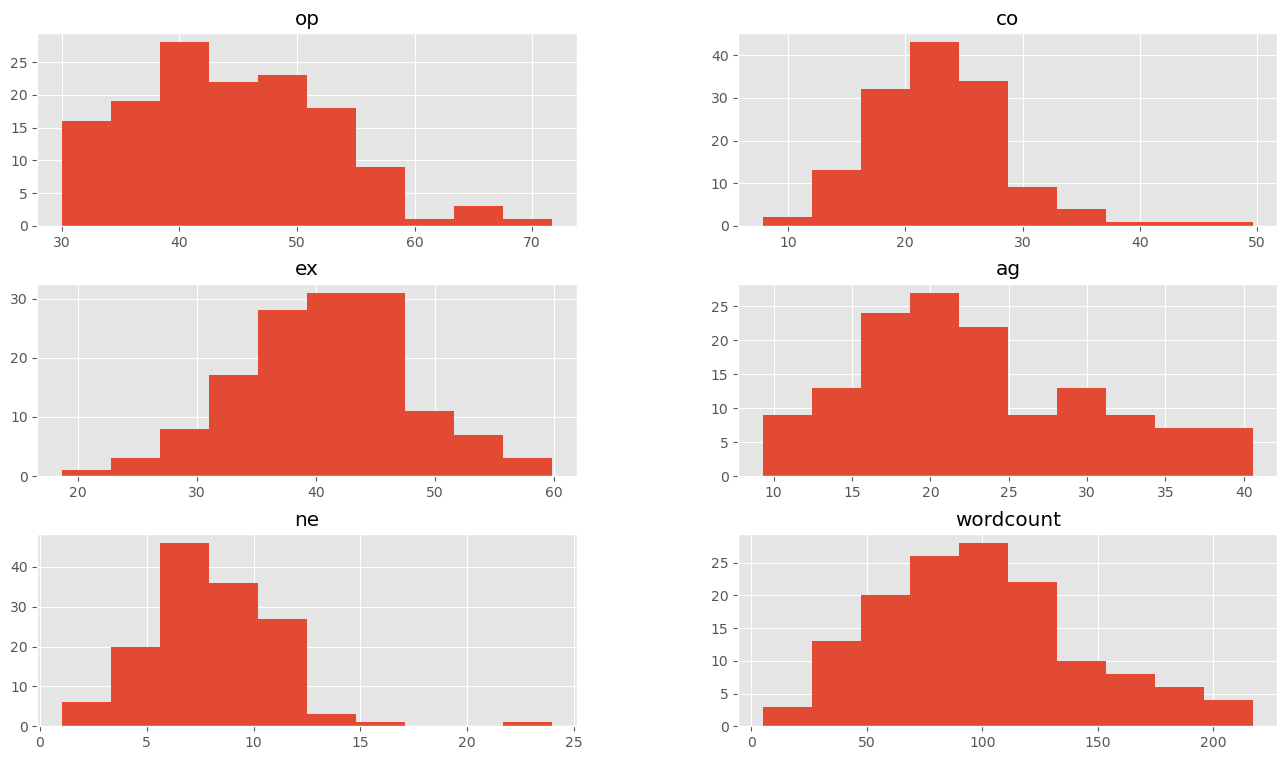

In [5]:
dataframe.drop(columns='categoria').hist()
plt.show()

We choose 3 features (op, ex, ag) and see how related they are

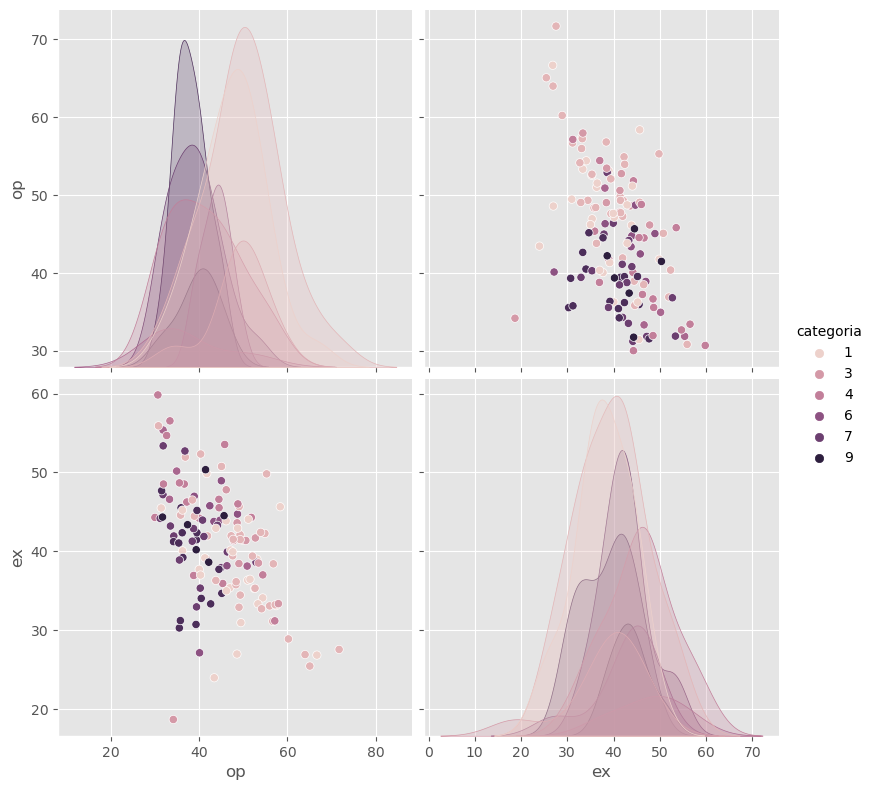

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex"],kind='scatter')

## Entry data

In [7]:
X = np.array(dataframe[["op","ex"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 2)

In [8]:
dataframe['categoria']

0      7
1      7
2      4
3      2
4      4
      ..
135    7
136    4
137    2
138    1
139    1
Name: categoria, Length: 140, dtype: int64

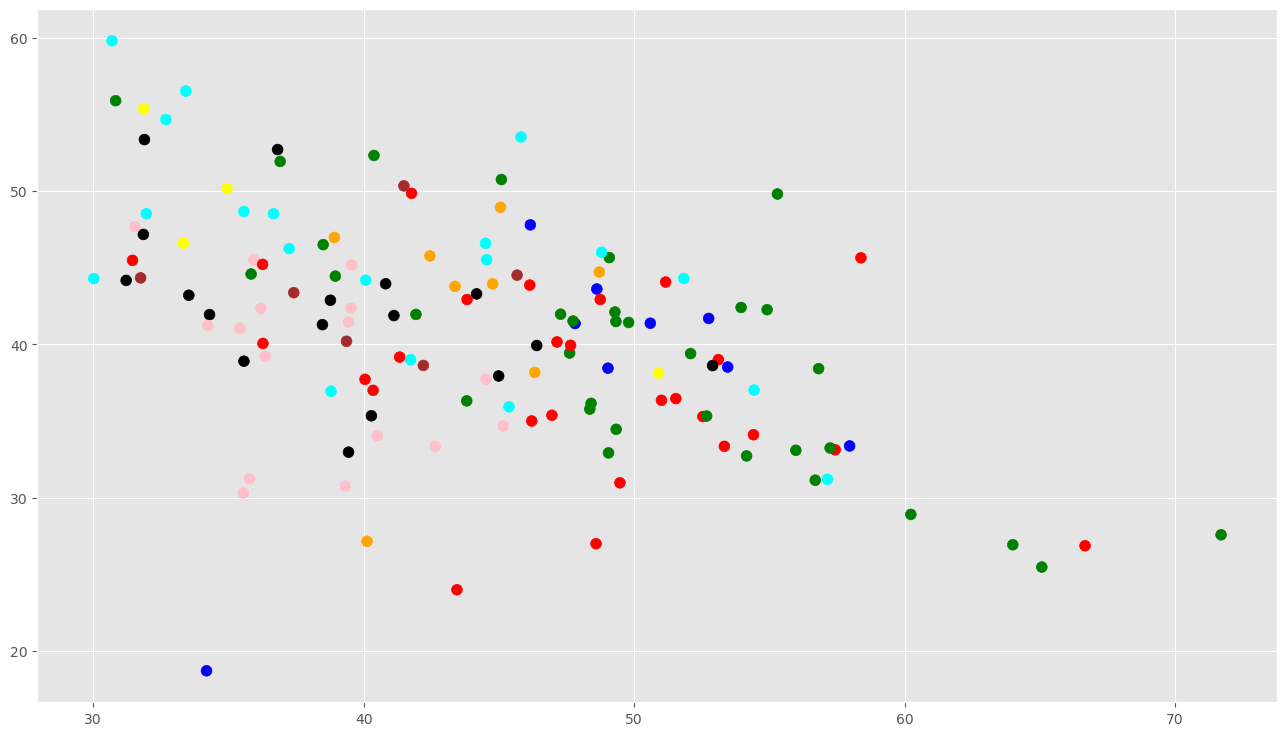

In [9]:
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown']
asignar=[]
for row in y:
    asignar.append(colores[row])
plt.scatter(X[:, 0], X[:, 1], c=asignar,s=60)

## Getting the K value

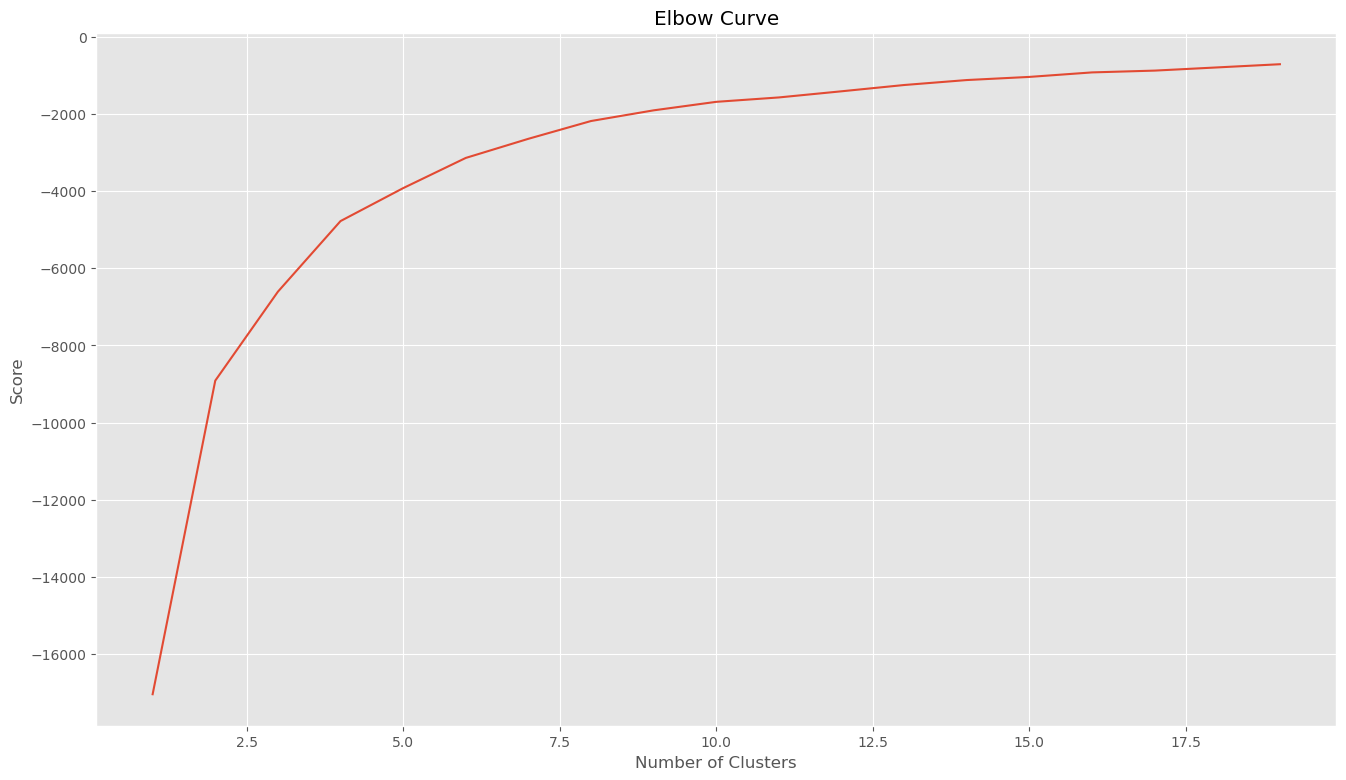

In [10]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Looking at the curve 5 is a good number (could be other)

# Executing 

In [11]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids) #5 3d points

[[40.18168279 44.09480726]
 [60.35359892 30.299381  ]
 [50.81599576 40.17080493]
 [33.28917345 50.42137115]
 [42.36449512 32.99667513]]


In [12]:
# Predicting the clusters
labels = kmeans.predict(X)

In [13]:
labels

array([0, 4, 0, 3, 3, 0, 3, 3, 2, 4, 2, 0, 2, 2, 0, 2, 0, 0, 2, 3, 3, 2,
       4, 3, 2, 4, 0, 0, 0, 2, 0, 2, 2, 2, 3, 3, 0, 3, 0, 4, 0, 0, 0, 4,
       2, 1, 2, 2, 3, 3, 2, 0, 0, 1, 4, 2, 4, 2, 4, 1, 4, 4, 2, 1, 0, 0,
       1, 4, 2, 0, 0, 4, 4, 2, 4, 1, 0, 3, 3, 3, 3, 0, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 4, 4, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 3, 1, 2, 0, 0, 0, 2,
       0, 0, 3, 0, 3, 0, 4, 1, 0, 0, 4, 0, 2, 4, 1, 4, 4, 2, 2, 4, 2, 2,
       4, 0, 1, 0, 3, 1, 2, 0], dtype=int32)

### Adding the cluster tag to the dataframe

In [14]:
dataframe.insert(8,'cluster', labels)

In [15]:
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,cluster
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,4
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,0
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,3
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,3


In [21]:
C = kmeans.cluster_centers_
# Getting the cluster centers
colores_clusters=['red','green','blue','cyan','yellow']
#A color for every cluster
asignar=[]
for row in labels:
    asignar.append(colores_clusters[row])

In [22]:
colores_clusters

['red', 'green', 'blue', 'cyan', 'yellow']

In [23]:
asignar

['red',
 'yellow',
 'red',
 'cyan',
 'cyan',
 'red',
 'cyan',
 'cyan',
 'blue',
 'yellow',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'cyan',
 'cyan',
 'blue',
 'yellow',
 'cyan',
 'blue',
 'yellow',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'cyan',
 'cyan',
 'red',
 'cyan',
 'red',
 'yellow',
 'red',
 'red',
 'red',
 'yellow',
 'blue',
 'green',
 'blue',
 'blue',
 'cyan',
 'cyan',
 'blue',
 'red',
 'red',
 'green',
 'yellow',
 'blue',
 'yellow',
 'blue',
 'yellow',
 'green',
 'yellow',
 'yellow',
 'blue',
 'green',
 'red',
 'red',
 'green',
 'yellow',
 'blue',
 'red',
 'red',
 'yellow',
 'yellow',
 'blue',
 'yellow',
 'green',
 'red',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'red',
 'green',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'cyan',
 'green',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 

In [24]:
C

array([[40.18168279, 44.09480726],
       [60.35359892, 30.299381  ],
       [50.81599576, 40.17080493],
       [33.28917345, 50.42137115],
       [42.36449512, 32.99667513]])

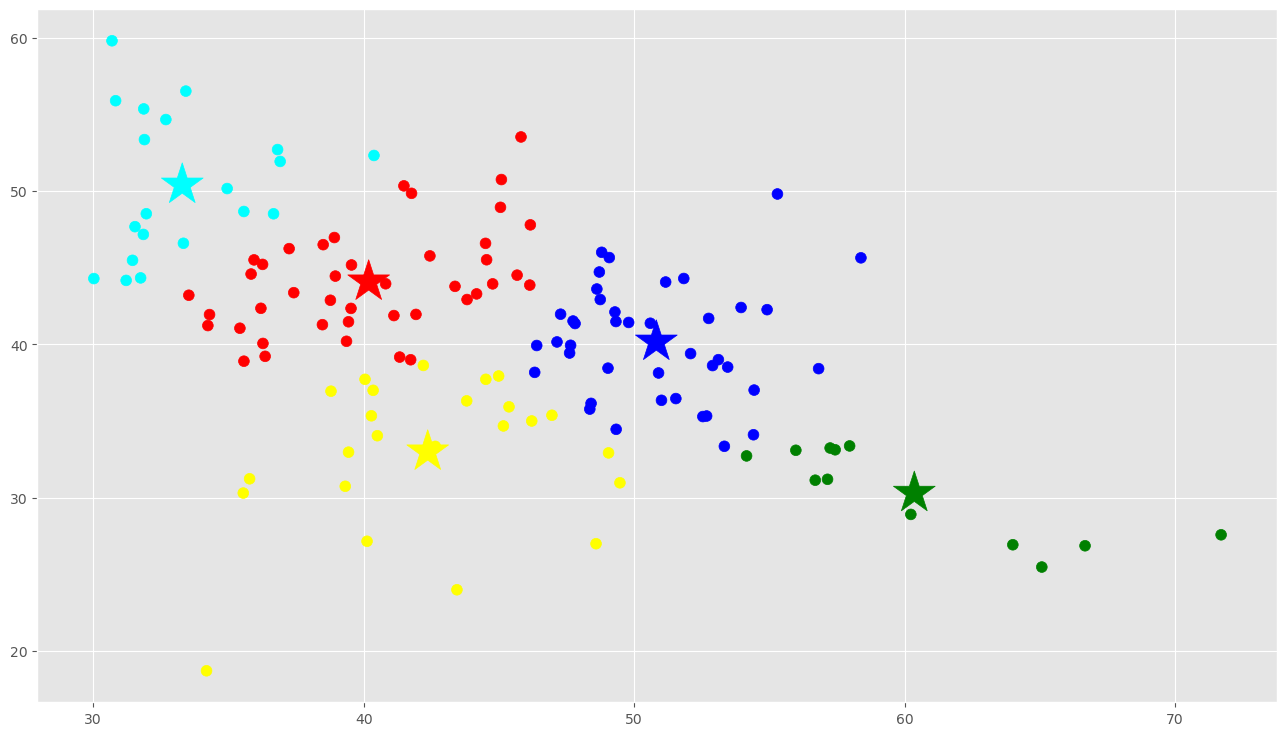

In [25]:
# X[:, 1]=> column 1
plt.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores_clusters, s=1000)

The groups are very defined.

## Users per cluster

In [31]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
copy['label_color'] = asignar;




In [32]:
copy

,usuario,categoria,label,label_color
0,3gerardpique,7,0,red
1,aguerosergiokun,7,4,yellow
2,albertochicote,4,0,red
3,AlejandroSanz,2,3,cyan
4,alfredocasero1,4,3,cyan
...,...,...,...,...
135,XabiAlonso,7,0,red
136,XaviRodriguez,4,3,cyan
137,xoellopez,2,1,green
138,ZacEfron,1,2,blue


In [29]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores_clusters
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,43
1,green,12
2,blue,41
3,cyan,20
4,yellow,24
